<a href="https://colab.research.google.com/github/kogocugu/AI-RyanSatriaPratama/blob/main/Ryan_satria_Pratama_20220801217_UAS_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ryan satria pratama - 20220801217
UAS - AI


**- Disini saya akan menclusster data dari kaggle yang telah saya download dari website kagglenya. Data tersebut yaitu netflik, saya telah mengekstraknya.**

Silakan unggah file dataset Anda (format .csv)


Saving netflix_titles.csv to netflix_titles (5).csv
File netflix_titles (5).csv berhasil diunggah!

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None

Jumlah data per kategori:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64

=== Exploratory Data Analysis (EDA) ===
  

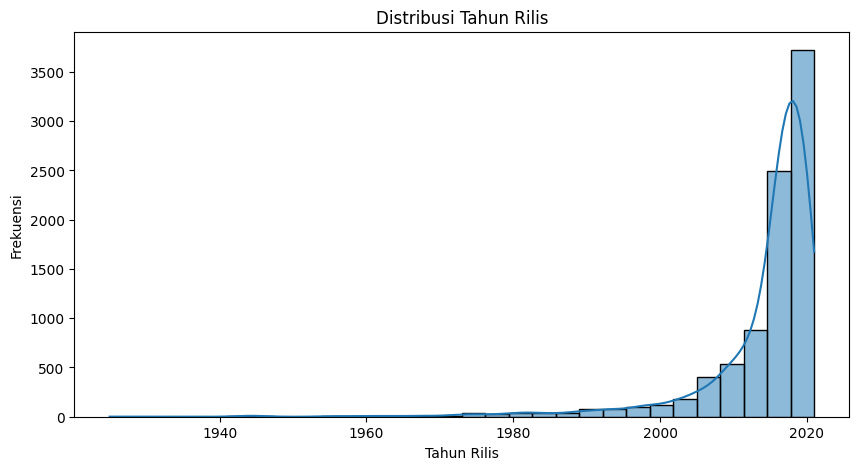

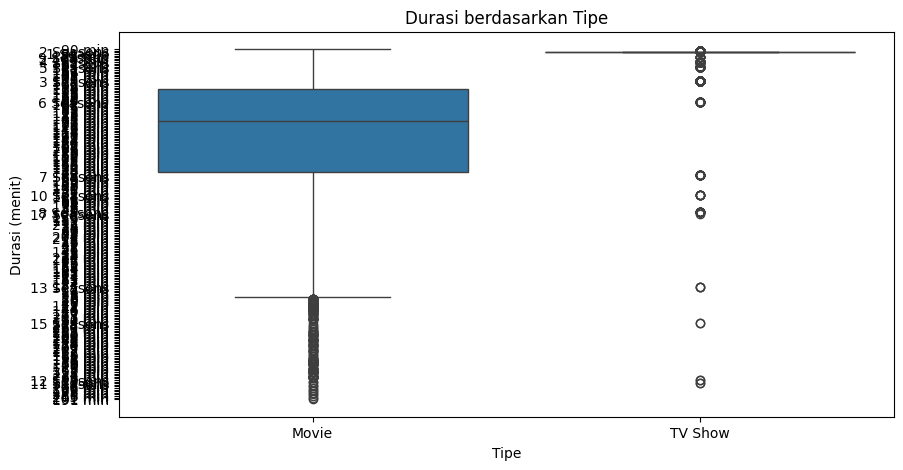


=== Preprocessing Data ===
Preprocessing selesai!

=== Clustering dengan K-Means ===


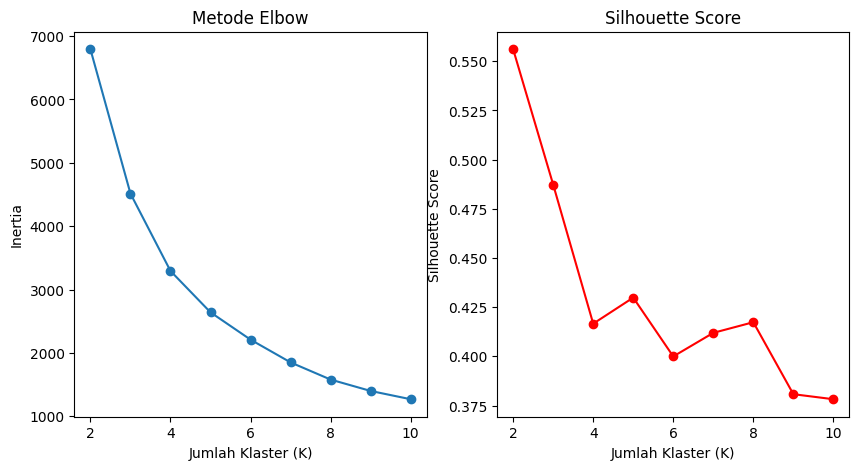

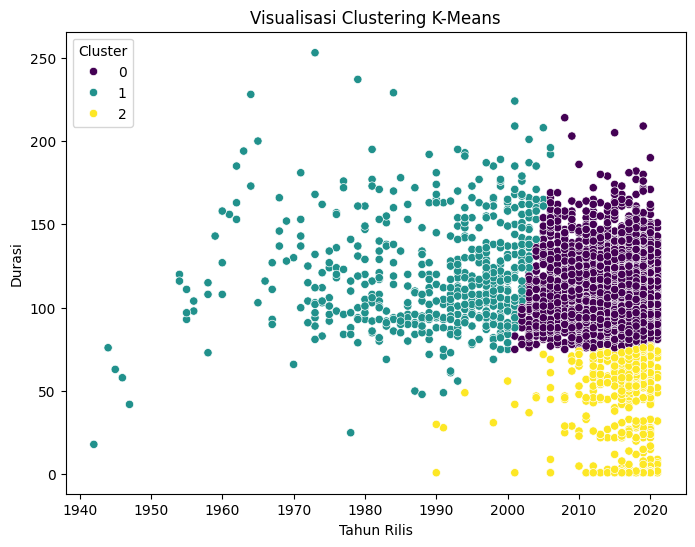

Clustering selesai!

=== Klasifikasi dengan Machine Learning ===
Akurasi Model: 0.9991
Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1035
           1       0.97      1.00      0.98        32

    accuracy                           1.00      1067
   macro avg       0.98      1.00      0.99      1067
weighted avg       1.00      1.00      1.00      1067



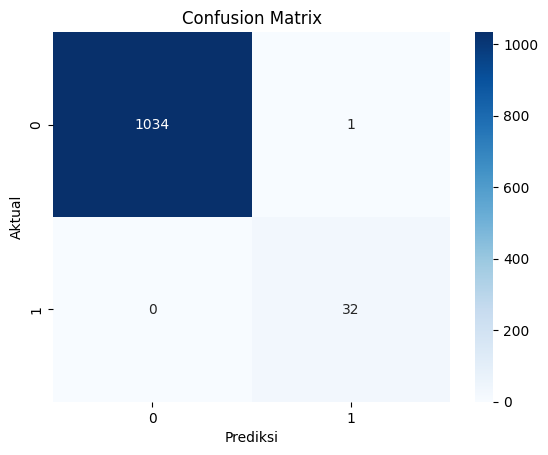


=== Hyperparameter Tuning ===
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy: 0.9995
Cross Validation Scores: [0.99906279 0.99812559 1.         1.         1.        ]
Mean CV Accuracy: 0.9994

Proses selesai! 🚀


In [26]:
# Import Library yang Dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, silhouette_score, confusion_matrix
from google.colab import files  # Untuk upload file manual

# Unggah Dataset Secara Manual di Google Colab
print("Silakan unggah file dataset Anda (format .csv)")
uploaded = files.upload()  # Anda akan diminta mengunggah file secara manual

# Ambil nama file yang diunggah
file_name = list(uploaded.keys())[0]
print(f"File {file_name} berhasil diunggah!")

# Load Dataset
df = pd.read_csv(file_name)

# Menampilkan informasi dataset
print("\nInfo Dataset:")
print(df.info())
print("\nJumlah data per kategori:")
print(df['type'].value_counts())

# Langkah 3: Exploratory Data Analysis (EDA)
print("\n=== Exploratory Data Analysis (EDA) ===")
print(df.describe())

# Visualisasi distribusi tahun rilis
plt.figure(figsize=(10, 5))
sns.histplot(df['release_year'], bins=30, kde=True)
plt.title("Distribusi Tahun Rilis")
plt.xlabel("Tahun Rilis")
plt.ylabel("Frekuensi")
plt.show()

# Visualisasi durasi berdasarkan tipe
plt.figure(figsize=(10, 5))
sns.boxplot(x='type', y=df['duration'].dropna(), data=df)
plt.title("Durasi berdasarkan Tipe")
plt.xlabel("Tipe")
plt.ylabel("Durasi (menit)")
plt.show()

# Langkah 4: Data Preprocessing
print("\n=== Preprocessing Data ===")
df.dropna(inplace=True)
df['duration'] = df['duration'].str.extract('(\d+)').astype(float)
label_encoder = LabelEncoder()
df['type_encoded'] = label_encoder.fit_transform(df['type'])

# Normalisasi Data
features = ['release_year', 'duration']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Preprocessing selesai!\n")

# Langkah 5: Clustering dengan K-Means
print("=== Clustering dengan K-Means ===")

# Menentukan jumlah klaster optimal dengan metode elbow
inertia = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Menampilkan grafik metode elbow
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Jumlah Klaster (K)')
plt.ylabel('Inertia')
plt.title('Metode Elbow')

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', color='red')
plt.xlabel('Jumlah Klaster (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.show()

optimal_k = 3  # Ubah berdasarkan elbow & silhouette score
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['release_year'], y=df['duration'], hue=df['cluster'], palette='viridis')
plt.title("Visualisasi Clustering K-Means")
plt.xlabel("Tahun Rilis")
plt.ylabel("Durasi")
plt.legend(title="Cluster")
plt.show()

print("Clustering selesai!\n")

# Langkah 6: Machine Learning - Klasifikasi
print("=== Klasifikasi dengan Machine Learning ===")
df['cluster_encoded'] = label_encoder.fit_transform(df['cluster'].astype(str))
features_ml = ['release_year', 'duration', 'cluster_encoded']
X_ml = df[features_ml]
y = df['type_encoded']
X_train, X_test, y_train, y_test = train_test_split(X_ml, y, test_size=0.2, random_state=42)

# Model Klasifikasi
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi Model: {accuracy:.4f}')
print('Laporan Klasifikasi:')
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

# Hyperparameter Tuning
print("\n=== Hyperparameter Tuning ===")
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Accuracy: {grid_search.best_score_:.4f}")

# Evaluasi dengan Cross Validation
cv_scores = cross_val_score(model, X_ml, y, cv=5)
print(f"Cross Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.4f}")

print("\nProses selesai! 🚀")
